In [ ]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet (1).csv


In [ ]:
#importing library
import io
data = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet.csv']))

# **Praproses**

In [ ]:
#checking data
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
#checking null value
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
#create a copy of the data
datcop = data.copy()

In [ ]:
#one hot encoding
datcop.replace({'Gender' : {'Male': 0 , 'Female': 1}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,0,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,1,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,0,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,0,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,0,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
#checking the MTRANS value
datcop['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [ ]:
#one hot encoding
datcop.replace({'MTRANS' : {'Public_Transportation': 0 , 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike':4}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,0,Normal_Weight
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,0,Normal_Weight
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,0,Normal_Weight
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,1,Overweight_Level_I
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,0,Overweight_Level_II
5,0,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,2,Normal_Weight
6,1,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,3,Normal_Weight
7,0,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,0,Normal_Weight
8,0,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,0,Normal_Weight
9,0,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,0,Normal_Weight


In [ ]:
#checking the NObeyesdad value
datcop['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
#one hot encoding
datcop.replace({'NObeyesdad' : {'Normal_Weight': 0 , 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II':5, 'Obesity_Type_III':6, 'Insufficient_Weight': 4}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,0,0
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,0,0
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,0,0
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,1,1
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,0,2
5,0,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,2,0
6,1,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,3,0
7,0,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,0,0
8,0,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,0,0
9,0,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,0,0


In [ ]:
#checking the CAEC value
datcop['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [ ]:
#one hot encoding
datcop.replace({'CAEC' : {'no': 0 , 'Frequently': 1, 'Sometimes': 2, 'Always': 3}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,2,no,2.0,no,0.0,1.0,no,0,0
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,2,yes,3.0,yes,3.0,0.0,Sometimes,0,0
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,2,no,2.0,no,2.0,1.0,Frequently,0,0
3,0,27.0,1.80,87.0,no,no,3.0,3.0,2,no,2.0,no,2.0,0.0,Frequently,1,1
4,0,22.0,1.78,89.8,no,no,2.0,1.0,2,no,2.0,no,0.0,0.0,Sometimes,0,2
5,0,29.0,1.62,53.0,no,yes,2.0,3.0,2,no,2.0,no,0.0,0.0,Sometimes,2,0
6,1,23.0,1.50,55.0,yes,yes,3.0,3.0,2,no,2.0,no,1.0,0.0,Sometimes,3,0
7,0,22.0,1.64,53.0,no,no,2.0,3.0,2,no,2.0,no,3.0,0.0,Sometimes,0,0
8,0,24.0,1.78,64.0,yes,yes,3.0,3.0,2,no,2.0,no,1.0,1.0,Frequently,0,0
9,0,22.0,1.72,68.0,yes,yes,2.0,3.0,2,no,2.0,no,1.0,1.0,no,0,0


In [ ]:
#checking the CALC value
datcop['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [ ]:
#one hot encoding
datcop.replace({'CALC' : {'no': 0 , 'Frequently': 1, 'Sometimes': 2, 'Always': 3}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,2,no,2.0,no,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,2,yes,3.0,yes,3.0,0.0,2,0,0
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,2,no,2.0,no,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,no,no,3.0,3.0,2,no,2.0,no,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,no,no,2.0,1.0,2,no,2.0,no,0.0,0.0,2,0,2
5,0,29.0,1.62,53.0,no,yes,2.0,3.0,2,no,2.0,no,0.0,0.0,2,2,0
6,1,23.0,1.50,55.0,yes,yes,3.0,3.0,2,no,2.0,no,1.0,0.0,2,3,0
7,0,22.0,1.64,53.0,no,no,2.0,3.0,2,no,2.0,no,3.0,0.0,2,0,0
8,0,24.0,1.78,64.0,yes,yes,3.0,3.0,2,no,2.0,no,1.0,1.0,1,0,0
9,0,22.0,1.72,68.0,yes,yes,2.0,3.0,2,no,2.0,no,1.0,1.0,0,0,0


In [ ]:
#one hot encoding
datcop.replace({'family_history_with_overweight' : {'no': 0 , 'yes': 1}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,no,2.0,3.0,2,no,2.0,no,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,1,no,3.0,3.0,2,yes,3.0,yes,3.0,0.0,2,0,0
2,0,23.0,1.80,77.0,1,no,2.0,3.0,2,no,2.0,no,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,0,no,3.0,3.0,2,no,2.0,no,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,0,no,2.0,1.0,2,no,2.0,no,0.0,0.0,2,0,2
5,0,29.0,1.62,53.0,0,yes,2.0,3.0,2,no,2.0,no,0.0,0.0,2,2,0
6,1,23.0,1.50,55.0,1,yes,3.0,3.0,2,no,2.0,no,1.0,0.0,2,3,0
7,0,22.0,1.64,53.0,0,no,2.0,3.0,2,no,2.0,no,3.0,0.0,2,0,0
8,0,24.0,1.78,64.0,1,yes,3.0,3.0,2,no,2.0,no,1.0,1.0,1,0,0
9,0,22.0,1.72,68.0,1,yes,2.0,3.0,2,no,2.0,no,1.0,1.0,0,0,0


In [ ]:
#one hot encoding
datcop.replace({'SCC' : {'no': 0 , 'yes': 1}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,no,2.0,3.0,2,no,2.0,0,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,1,no,3.0,3.0,2,yes,3.0,1,3.0,0.0,2,0,0
2,0,23.0,1.80,77.0,1,no,2.0,3.0,2,no,2.0,0,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,0,no,3.0,3.0,2,no,2.0,0,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,0,no,2.0,1.0,2,no,2.0,0,0.0,0.0,2,0,2
5,0,29.0,1.62,53.0,0,yes,2.0,3.0,2,no,2.0,0,0.0,0.0,2,2,0
6,1,23.0,1.50,55.0,1,yes,3.0,3.0,2,no,2.0,0,1.0,0.0,2,3,0
7,0,22.0,1.64,53.0,0,no,2.0,3.0,2,no,2.0,0,3.0,0.0,2,0,0
8,0,24.0,1.78,64.0,1,yes,3.0,3.0,2,no,2.0,0,1.0,1.0,1,0,0
9,0,22.0,1.72,68.0,1,yes,2.0,3.0,2,no,2.0,0,1.0,1.0,0,0,0


In [ ]:
#one hot encoding
datcop.replace({'FAVC' : {'no': 0 , 'yes': 1}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,2,no,2.0,0,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,yes,3.0,1,3.0,0.0,2,0,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,2,no,2.0,0,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,2,no,2.0,0,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,2,no,2.0,0,0.0,0.0,2,0,2
5,0,29.0,1.62,53.0,0,1,2.0,3.0,2,no,2.0,0,0.0,0.0,2,2,0
6,1,23.0,1.50,55.0,1,1,3.0,3.0,2,no,2.0,0,1.0,0.0,2,3,0
7,0,22.0,1.64,53.0,0,0,2.0,3.0,2,no,2.0,0,3.0,0.0,2,0,0
8,0,24.0,1.78,64.0,1,1,3.0,3.0,2,no,2.0,0,1.0,1.0,1,0,0
9,0,22.0,1.72,68.0,1,1,2.0,3.0,2,no,2.0,0,1.0,1.0,0,0,0


In [ ]:
#one hot encoding
datcop.replace({'SMOKE' : {'no': 0 , 'yes': 1}}, inplace=True)
datcop.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,0,0,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,0,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,0,2
5,0,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,2,0
6,1,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,3,0
7,0,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,0,0
8,0,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,0,0
9,0,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,0,0,0


In [ ]:
#changing data type
datcop.Age = datcop.Age.astype(int)
datcop.Weight = datcop.Weight.astype(int)
datcop.Height = datcop.Height.astype(int)
datcop.CH2O = datcop.CH2O.astype(int)
datcop.FAF = datcop.FAF.astype(int)
datcop.TUE = datcop.TUE.astype(int)
datcop.FCVC = datcop.FCVC.astype(int)
datcop.NCP = datcop.NCP.astype(int)

In [70]:
datcop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   int64
 1   Age                             2111 non-null   int64
 2   Height                          2111 non-null   int64
 3   Weight                          2111 non-null   int64
 4   family_history_with_overweight  2111 non-null   int64
 5   FAVC                            2111 non-null   int64
 6   FCVC                            2111 non-null   int64
 7   NCP                             2111 non-null   int64
 8   CAEC                            2111 non-null   int64
 9   SMOKE                           2111 non-null   int64
 10  CH2O                            2111 non-null   int64
 11  SCC                             2111 non-null   int64
 12  FAF                             2111 non-null   int64
 13  TUE

In [51]:
datcop

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,0,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,0,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,0,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,1,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,0,6
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,0,6
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,0,6
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,0,6


In [ ]:
#feature selection
#selecting height and weight because they have relation with the decision attribute
x = datcop[["Height", "Weight"]]
#defining the decision attribute
y = datcop["NObeyesdad"]

Text(0, 0.5, 'Height')

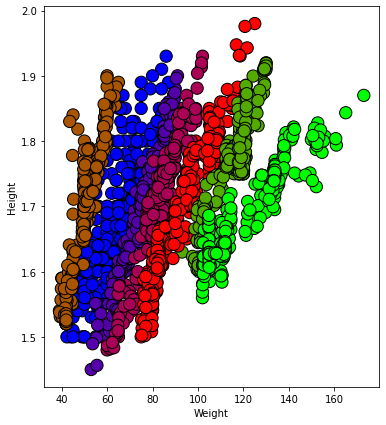

In [ ]:
# visualization
fig, axes = plt.subplots(1, figsize=(6,7))
axes.scatter(x["Weight"], x["Height"], c=y, cmap='brg', edgecolor='k', s=150)
axes.set_xlabel("Weight")
axes.set_ylabel('Height')

# **K-Means Clustering**

In [ ]:
#import kmeans
from sklearn.cluster import KMeans

#setting up the KMeans
kmean = KMeans(n_clusters=7, random_state=42)

#fitting model
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#getting the centroid
centers = kmean.cluster_centers_
print(centers)

[[  1.74715955  88.45310639]
 [  1.75008924 116.15192217]
 [  1.64129631  49.19686672]
 [  1.77444395 136.46338795]
 [  1.66104383  64.31868477]
 [  1.71789167 103.18018101]
 [  1.6768734   78.62484248]]


In [ ]:
#creating and taking the labels
new_labels = kmean.labels_

new_labels

array([4, 2, 6, ..., 3, 3, 3], dtype=int32)

Text(0.5, 1.0, 'Predicted')

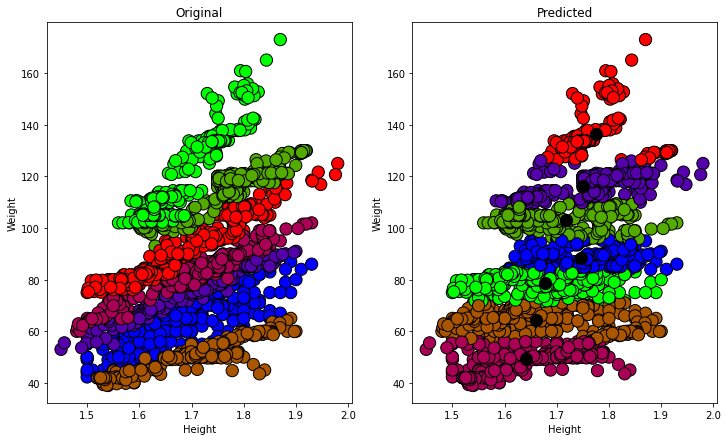

In [ ]:
# visualization
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].scatter(x["Height"], x["Weight"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(x["Height"], x["Weight"], c=new_labels, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=150)
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Weight')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Weight')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

In [ ]:
# clustering process by getting the label
kmean = KMeans(n_clusters=7, random_state=42)
kmean.fit(x)
new_labels = kmean.labels_

# creating two metrics, first one is real value, and second one is prediction value
origin = datcop[["Height", "Weight", "NObeyesdad"]]
predicted = datcop[["Height", "Weight"]]
predicted["NObeyesdad"] = new_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#calculating Normalized Mutual Info Score or Entropy
from sklearn.metrics.cluster import v_measure_score
v_measure_score(origin.values.flatten(), predicted.values.flatten())

0.8419308475215079

# **Average  Hierarchical  Clustering**

In [ ]:
#import library
from sklearn.cluster import AgglomerativeClustering

#defining the method
cluster = AgglomerativeClustering(n_clusters=7, linkage="average")
cluster.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7)

In [ ]:
#creating label for the clusters
new_labels = cluster.labels_
new_labels

array([6, 2, 3, ..., 4, 4, 4])

Text(0.5, 1.0, 'Predicted')

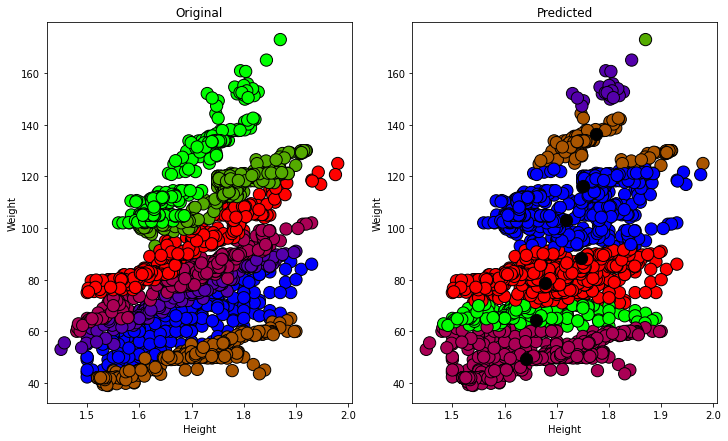

In [ ]:
#visualization of the comparable origin class with the cluster value
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].scatter(x["Height"], x["Weight"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(x["Height"], x["Weight"], c=new_labels, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=150)
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Weight')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Weight')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

In [ ]:
avg = AgglomerativeClustering(n_clusters=7, linkage="average")
avg.fit(x)
new_labels_avg = avg.labels_

# creating two metrics, first one is real value, the second is predictive value
origin = datcop[["Height", "Weight", "NObeyesdad"]]
predicted_avg = datcop[["Height", "Weight"]]
predicted_avg["NObeyesdad"] = new_labels_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#calculating the Normalized Mutual Info Score or Entropy
from sklearn.metrics.cluster import v_measure_score
v_measure_score(origin.values.flatten(), predicted_avg.values.flatten())

0.8794251990996029

# **Evaluasi**

Dapat dilihat bahwasanya nilai entropy dari K-Means dan Average Hierarchical Clustering mendapatkan nilai sebesar 0.8419308475215079 untuk K-means dan 0.8794251990996029 untuk AHC yang mana K-means adalah hasil yang lebih mendekati 0

Text(0.5, 1.0, 'Predicted (Average)')

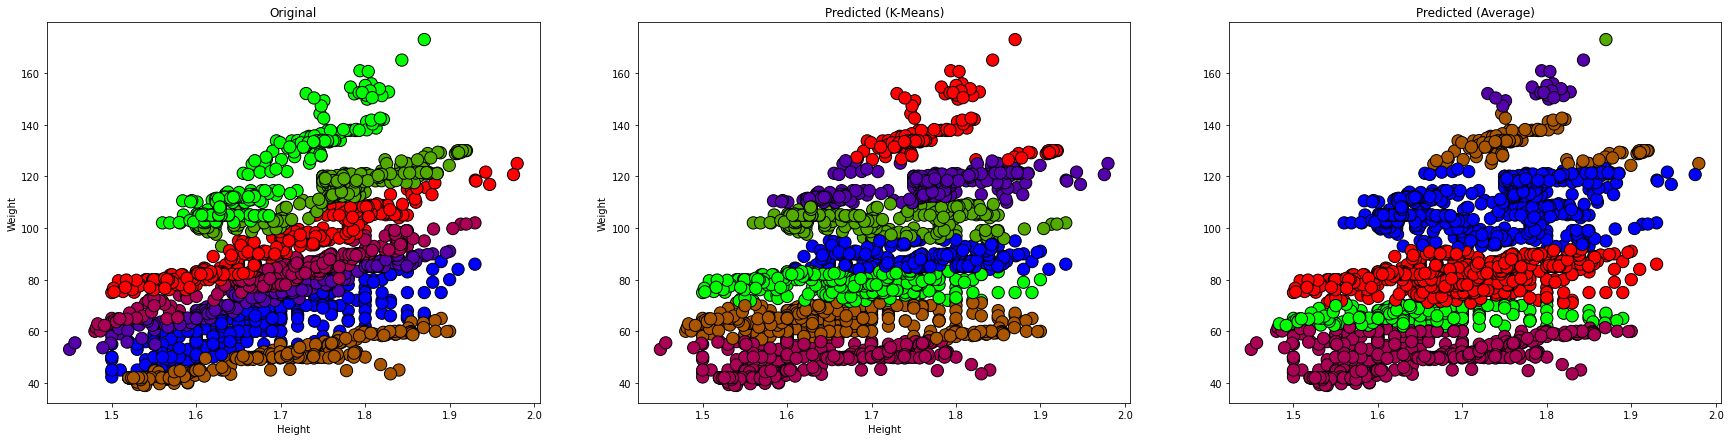

In [79]:
# agglomerative average
kmean = KMeans(n_clusters=7, random_state=42)
kmean.fit(x)
avg = AgglomerativeClustering(n_clusters=7, linkage="average")
avg.fit(x)

kmeans_label = kmean.labels_
avg_label = avg.labels_

fig, axes = plt.subplots(1, 3, figsize=(30,7))
axes[0].scatter(x["Height"], x["Weight"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(x["Height"], x["Weight"], c=kmean.labels_, cmap='brg', edgecolor='k', s=150)
axes[2].scatter(x["Height"], x["Weight"], c=avg.labels_, cmap='brg', edgecolor='k', s=150)
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Weight')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Weight')
axes[0].set_title('Original')
axes[1].set_title('Predicted (K-Means)')
axes[2].set_title('Predicted (Average)')

Dapat dilihat bahwasanya memang K-means cenderung memotong tengah dari setiap data untuk membuatkan cluster, berbeda dengan average hierarchical clustering yang dapat dilihat bahwa terdapat cluster yang tidak memiliki anggota. Sebenarnya hal ini bisa saja terjadi namun jika dilihat maka jelas tidak menunjukkan suatu hasil yang baik. Pada average hierarchical clustering juga mengalami overlapping yang membuat metode ini dirasa kurang cocok. Jadi kesimpulannya adalah metode K-means adalah metode yang lebih cocok untuk digunakan pada dataset ini.

# **Asosiasi**

In [1]:
!pip install mlxtend==0.18.0

In [67]:
datcop

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1,64,1,0,2,3,2,0,2,0,0,1,0,0,0
1,1,21,1,56,1,0,3,3,2,1,3,1,3,0,2,0,0
2,0,23,1,77,1,0,2,3,2,0,2,0,2,1,1,0,0
3,0,27,1,87,0,0,3,3,2,0,2,0,2,0,1,1,1
4,0,22,1,89,0,0,2,1,2,0,2,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1,131,1,1,3,3,2,0,1,0,1,0,2,0,6
2107,1,21,1,133,1,1,3,3,2,0,2,0,1,0,2,0,6
2108,1,22,1,133,1,1,3,3,2,0,2,0,1,0,2,0,6
2109,1,24,1,133,1,1,3,3,2,0,2,0,1,0,2,0,6
